In [1]:
import sys, os, time
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib tk
import numpy as np
import select
import json
import yaml
import matplotlib.pyplot as plt
from collections import namedtuple, OrderedDict
import multiprocessing as mp
import random
from string import Formatter
from scipy.special import softmax
from itertools import chain, product
# import gsm
import gsm
from gsm import tdict, tlist, tset, tstack, tdeque
from gsm import GameObject, GameLogger
from gsm.mixins import Named
from gsm import Array
from gsm import viz
from gsm import util
from examples.tictactoe import TicTacToe
from gsm.common.world import grid
np.set_printoptions(linewidth=120)

INFO:gsm.core.controller: Config dir found for Catan at /mnt/c/Users/anwan/Nextcloud/Khan/projects/gsm/examples/catan/config
/mnt/c/Users/anwan/Nextcloud/Khan/projects/gsm/gsm/io/registry.py:54: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  info = yaml.load(open(info_path, 'r'))
INFO:gsm.core.controller: Config dir found for TicTacToe at /mnt/c/Users/anwan/Nextcloud/Khan/projects/gsm/examples/tictactoe/config
DEBUG:gsm.io.registry: Registering game: ttt


In [2]:
seed = 2
# seed = None
play = True
I = viz.Ipython_Runner(r'http://localhost:5000/', 'me', full_log=False, god_mode=True, seed=seed)

In [3]:
I.restart(debug=True)

'Host restarted (debug=True)'

In [4]:
I.available_games()

['catan', 'ttt']

In [5]:
I.select_game('catan')

'Game set to: catan'

In [6]:
I.game_players()

['White', 'Red', 'Blue', 'Orange']

In [7]:
I.add_client('randy', 'pal', 'polly', 'robby', interface='agent', agent_type='pass', timeout=None, seed=I.seed, prob=.5)
# if play:
#     print(I.add_client('randy', 'polly', 'robby', interface='agent', agent_type='regular', timeout=None, seed=I.seed))
# else:
#     print(I.add_client('pal', 'randy', 'polly', 'robby', interface='agent', agent_type='regular', timeout=None, seed=I.seed))

'Created an interface (agent) for: randy, pal, polly, robby'

In [8]:
I.ping()

{'randy': ['ping reply from pass agent/s: randy, pal, polly, robby',
  1.190032958984375],
 'pal': ['ping reply from pass agent/s: randy, pal, polly, robby', 0.0],
 'polly': ['ping reply from pass agent/s: randy, pal, polly, robby', 0.0],
 'robby': ['ping reply from pass agent/s: randy, pal, polly, robby', 0.0]}

In [9]:
if play:
    I.add_player('me', 'White')
    print('me is playing White')
else:
    I.add_spectator('me')
    I.add_player('pal', 'White')
    print('me is not playing')
I.add_player('randy', 'Blue')
I.add_player('polly', 'Red')
I.add_player('robby', 'Orange')
pass
# I.add_advisor('pal', 'White')

me is playing White


In [10]:
roles = I.get_roles()
if 'me' not in roles:
    print(I.toggle_pause())
else:
    I.toggle_pause()
    print(I.toggle_pause())
roles

auto pause is deactivated


{'me': 'White', 'polly': 'Red', 'randy': 'Blue', 'robby': 'Orange'}

In [11]:
I.begin()
# I.load('catan_setup', load_interface=False)

'Catan has started'

In [12]:
# I.cheat('next7')
# I.cheat('next7')
# I.cheat('gain8')
# I.cheat('devcard')

In [13]:
I.status()
I.view()

Received key: dcf4bb99f4bea973
Received table: 148 entries
-------------
Log
-------------

Phase: setup
+-----------------------------------------+
| Choose a location to place a settlement |
+-----------------------------------------+
-- loc-settlement : Available Locations --
   0 - OBJ[91]:Corner[91]
   1 - OBJ[92]:Corner[92]
   2 - OBJ[93]:Corner[93]
   3 - OBJ[94]:Corner[94]
   4 - OBJ[95]:Corner[95]
   5 - OBJ[96]:Corner[96]
   6 - OBJ[97]:Corner[97]
   7 - OBJ[98]:Corner[98]
   8 - OBJ[99]:Corner[99]
   9 - OBJ[100]:Corner[100]
  10 - OBJ[101]:Corner[101]
  11 - OBJ[102]:Corner[102]
  12 - OBJ[103]:Corner[103]
  13 - OBJ[104]:Corner[104]
  14 - OBJ[105]:Corner[105]
  15 - OBJ[106]:Corner[106]
  16 - OBJ[107]:Corner[107]
  17 - OBJ[108]:Corner[108]
  18 - OBJ[109]:Corner[109]
  19 - OBJ[110]:Corner[110]
  20 - OBJ[111]:Corner[111]
  21 - OBJ[112]:Corner[112]
  22 - OBJ[113]:Corner[113]
  23 - OBJ[114]:Corner[114]
  24 - OBJ[115]:Corner[115]
  25 - OBJ[116]:Corner[116]
  26 - OBJ

In [17]:
if I.actions is not None:
    I.step(0)
else:
    I.go()
I.status()
I.view()

*** ERROR: KeyError ***
Traceback (most recent call last):
  File "C:\Users\anwan\Nextcloud\Khan\projects\gsm\gsm\core\controller.py", line 310, in _step
    phase.execute(data, player=player, action=action)
  File "C:\Users\anwan\Nextcloud\Khan\projects\gsm\gsm\common\stages.py", line 96, in execute
    stage(self, C, player=player, action=action, **stage_info)
  File "C:\Users\anwan\Nextcloud\Khan\projects\gsm\examples\catan\phases\main.py", line 59, in roll
    hexes = C.state.numbers[self.roll]
  File "C:\Users\anwan\Nextcloud\Khan\projects\humpack\humpack\basic_containers.py", line 191, in __getitem__
    return self._data[item]
KeyError: <bound method MainPhase.roll of t{'stack':False, 'current_stage':'roll', 'decision_info':None, 'player':t{'color':'White', 'name':'White', 'reserve':t{'road':14, 'settlement':3, 'city':4}, 'buildings':t{'road':t{GameObject(ID=149)}, 'settlement':t{GameObject(ID=148), GameObject(ID=162)}, 'city':t{}}, 'resources':t{'wood':0, 'brick':0, 'sheep':2, 

AssertionError: 

In [29]:
# I.save('catan_setup')

In [30]:
viz.render_dict(I.msg)

In [17]:
msg = I.msg
util.obj_cross_ref(msg, {'_obj':msg.table, '_player':msg.players})
for ID, obj in msg.table.items():
    obj._id = ID
if 'options' in msg:
    options = tdict()
    for name, opts in msg.options.items():
        options[name] = viz.decode_action_set(opts.actions)
    msg.options = options
msg.keys()

odict_keys(['options', 'status', 'info', 'key', 'players', 'table', 'phase', 'log'])

In [18]:
table = msg.table
len(table)

160

In [19]:
# choose what hex to move the robber to
for a in (msg.options['loc'] if 'loc' in msg.options else :
    f = table[a[0]['ID']]
    for c in f.corners:
        if 'building' in c:
            print(a[0]['ID'], c.building.player.name)

KeyError: 'loc'

In [58]:
table['148'].keys()

odict_keys(['loc', 'player', 'obj_type', 'visible', '_id'])

In [32]:
IDs = ['148', '150', '152', '154', '156', '158', '160', '162']

In [33]:
sites = np.array([tdict() for i in IDs])
for site, ID in zip(sites, IDs):
    c = table[table[ID].loc._id]
    site.num = tlist(n.num for n in c.fields if n is not None and 'num' in n)
    site.res = tlist(n.res for n in c.fields if n is not None and 'res' in n)
[dict(s) for s in sites]

[{'num': [6, 4, 9], 'res': ['wheat', 'sheep', 'wood']},
 {'num': [10, 8, 5], 'res': ['brick', 'wood', 'brick']},
 {'num': [4, 6, 5], 'res': ['brick', 'wheat', 'wood']},
 {'num': [11, 5, 6], 'res': ['ore', 'wood', 'wheat']},
 {'num': [12, 9, 8], 'res': ['sheep', 'wood', 'wood']},
 {'num': [10, 5, 3], 'res': ['ore', 'brick', 'wheat']},
 {'num': [4, 10, 10], 'res': ['sheep', 'brick', 'ore']},
 {'num': [11, 6, 12], 'res': ['ore', 'wheat', 'sheep']}]

In [17]:
len(msg.options['loc-settlement'])

KeyError: 'loc-settlement'

In [38]:
msg.options['loc-settlement']

{(tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),), (tdict(ID, val, type),)}

In [39]:
sites = np.array([tdict(ID=a[0].ID) for a in options['loc-settlement']])
len(sites)

36

In [40]:
for site in sites:
    c = table[site['ID']]
    site.nums = tlist(n.num for n in c.fields if n is not None and 'num' in n)
    site.ress = tlist(n.res for n in c.fields if n is not None and 'res' in n)
    site.val = sum(6 - abs(n-7) for n in site.nums)
    if 'port' in c:
        site.port = c.port

In [41]:
dict(sites[1])

{'ID': '92', 'nums': [6, 3], 'ress': ['wood', 'wood'], 'val': 7}

In [42]:
vals = np.array([site.val for site in sites])
print(vals.argmax(), vals.max())
print(vals)

24 11
[ 2  7  9  4  2  2  5  8 10  9  3  3  4  6  8  5  0  8 10  1  5 10  5  8 11 10 11  4  4  6  5  2  4  4  9  5]


In [43]:
# first = sites[vals.argmax()]
dict(first)

{'ID': '133',
 'nums': [5, 8, 9],
 'ress': ['sheep', 'brick', 'wheat'],
 'val': 13}

In [48]:
res_names = np.array(['wood', 'brick', 'sheep', 'ore', 'wheat'])

In [118]:
residx = {r:i for i,r in enumerate(res_names)}

In [51]:
double = res_names[counts==2]
if len(double):
    print(double)

In [126]:
def get_nums(site):
    nums = np.zeros(11, dtype=int)
    for n in site.nums:
        nums[n-2] += 1
    return nums
def get_res(ress, residx):
    res = np.zeros(5)
    for r in ress:
        if r in residx:
            res[residx[r]] += 1
    return res

In [124]:
nums = get_nums(first)
rnum = get_res(first.ress, residx)
nums, rnum

(array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]), array([0., 1., 1., 0., 1.]))

In [63]:
all_nums = np.stack([get_nums(site) for site in sites])
all_nums.shape

(36, 11)

In [86]:
priority = 6 - np.abs(np.arange(11) - 5)

In [103]:
wts = priority/(nums/3+1)

In [135]:
dnum = (all_nums * wts).sum(-1) / 2
dnum

array([1.   , 3.5  , 4.5  , 2.   , 1.   , 1.   , 2.5  , 4.   , 5.   , 4.5  , 1.5  , 1.5  , 2.   , 3.   , 3.375, 1.875,
       0.   , 4.   , 5.   , 0.5  , 2.   , 4.5  , 1.875, 3.5  , 5.5  , 4.5  , 5.   , 1.5  , 1.5  , 2.5  , 2.   , 1.   ,
       1.5  , 1.5  , 3.375, 1.875])

In [108]:
top = (-dnum).argsort()[:5]

In [109]:
dnum[top]

array([11., 10., 10., 10.,  9.])

In [110]:
[dict(sites[i]) for i in top]

[{'ID': '122', 'nums': [6, 10, 4], 'ress': ['ore', 'ore', 'sheep'], 'val': 11},
 {'ID': '124',
  'nums': [5, 11, 6],
  'ress': ['sheep', 'wood', 'ore'],
  'val': 11},
 {'ID': '112', 'nums': [3, 6, 4], 'ress': ['ore', 'ore', 'sheep'], 'val': 10},
 {'ID': '99', 'nums': [4, 3, 6], 'ress': ['brick', 'ore', 'wood'], 'val': 10},
 {'ID': '123',
  'nums': [4, 10, 5],
  'ress': ['sheep', 'ore', 'sheep'],
  'val': 10}]

In [136]:
allr = np.stack([get_res(site.ress, residx) for site in sites])
allr.shape

(36, 5)

In [137]:
rval = (rnum + allr).clip(0,1).sum(-1)
rval

array([4., 4., 4., 4., 4., 4., 4., 4., 5., 5., 3., 3., 4., 5., 3., 3., 3., 5., 4., 4., 4., 5., 3., 3., 4., 4., 5., 3.,
       3., 4., 3., 4., 3., 3., 3., 3.])

<BarContainer object of 36 artists>

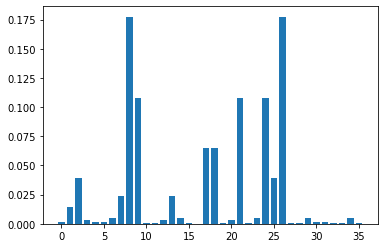

In [146]:
wts = softmax(dnum) * softmax(rval)
wts = wts / wts.sum()
plt.bar(np.arange(len(wts)),wts)

In [149]:
list(map(dict, sites[(-wts).argsort()[:5]]))

[{'ID': '124',
  'nums': [5, 11, 6],
  'ress': ['sheep', 'wood', 'ore'],
  'val': 11},
 {'ID': '99', 'nums': [4, 3, 6], 'ress': ['brick', 'ore', 'wood'], 'val': 10},
 {'ID': '122', 'nums': [6, 10, 4], 'ress': ['ore', 'ore', 'sheep'], 'val': 11},
 {'ID': '115', 'nums': [2, 5, 6], 'ress': ['wood', 'sheep', 'ore'], 'val': 10},
 {'ID': '100', 'nums': [6, 3, 11], 'ress': ['wood', 'ore', 'wheat'], 'val': 9}]

In [150]:
dict(first)

{'ID': '133',
 'nums': [5, 8, 9],
 'ress': ['sheep', 'brick', 'wheat'],
 'val': 13}

In [172]:
pick = I.rng.choices(sites, weights=wts)[0]
dict(pick)

{'ID': '124', 'nums': [5, 11, 6], 'ress': ['sheep', 'wood', 'ore'], 'val': 11}

In [31]:
actions = viz.decode_action_set(I.msg.options.loc.actions)
hexs = tlist(I.msg.table[a.ID] for a, in actions)
len(hexs)

18

In [32]:
hexs[0].keys()

odict_keys(['row', 'col', 'neighbors', 'obj_type', 'visible', 'edges', 'corners', 'res', 'num', '_id'])

In [33]:
remaining = tlist()
for h in hexs:
    for c in h.corners:
        if 'building' in c and c.building.player.name != 'White' and c.building.player.num_res > 0:
            remaining.append(h)
            break
hexs = remaining
len(hexs)

8

In [34]:
hexs = tdict({h._id:h for h in hexs})
options = tdict({k:tdict() for k in hexs})
for ID, h in hexs.items():
    options[ID].val = 5 - abs(h.num - 7)
    pass

In [35]:
options

tdict('5':tdict('val':1), '8':tdict('val':2), '9':tdict('val':2), '10':tdict('val':4), '13':tdict('val':3), '14':tdict('val':2), '15':tdict('val':1), '18':tdict('val':3))

In [38]:
hexs['10'].res, hexs['10'].num

('ore', 6)

In [24]:
log = I.get_log()
len(log)

28

In [21]:
for line in log:
    if 'targets' in line:
        print(line['targets'])

[tdict(_player)]
[tdict(_player)]
[tdict(_player)]
[tdict(_player)]


In [29]:
for h in hexs:
    if 'buildings' in h:
        print(h.corners)

In [31]:
hexs[0].corners

[tdict('_obj':'91'), tdict('_obj':'92'), tdict('_obj':'93'), tdict('_obj':'94'), tdict('_obj':'95'), tdict('_obj':'96')]

In [22]:
hexs = tlist()
for ID, obj in I.msg.table.items():
    if obj.obj_type == 'hex':
        hexs.append(obj)
len(hexs)

19